In [4]:
#author: Rene Lisasi Jamia Jackson
#Fraud Detection NN
#Machine Learning
#feedforward with 2 hidden layer with relu activation

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

def get_data(filename):
    df = pd.read_csv(filename)
    x = df.drop(columns=['merchant','first','last','gender','street','city','state','zip','job','dob','trans_num','unix_time','trans_date_trans_time','cc_num'])
    # y = df['is_fraud']
    dataset=x
    # dataset = np.column_stack((x, y))
    #np.random.shuffle(dataset)
    # Split data
    train_size = int(0.7 * len(dataset))
    train_dataset, test_dataset = dataset[:train_size], dataset[train_size:]
    #features
    train_dataset=np.delete(train_dataset,0,axis=1)
    test_dataset=np.delete(test_dataset,0,axis=1)
    #targets
    train_target=train_dataset[:,7]
    test_target=test_dataset[:,7]

    train_dataset=np.delete(train_dataset,7,axis=1)
    test_dataset=np.delete(test_dataset,7,axis=1)

    return train_dataset, test_dataset, train_target, test_target

#output get_data
train_sample,test_sample,train_target,test_target=get_data('fraudTrain.csv')

In [7]:
print(train_sample[4383])
print(train_target[4383])
# for (data, target) in train_sample:
#     print('data:', data.size(), 'type:', data.type())
#     print('target:', target.size(), 'type:', target.type())
#     break

[  13.        711.66       40.3359    -79.6607   1472.         41.207335
  -78.840933]
1.0


In [8]:
from math import ceil
def data_iter(batch_size, X, y):
    x_batch=np.array_split(X, ceil(len(X) / batch_size))
    y_batch=np.array_split(y, ceil(len(y) / batch_size))
    return x_batch,y_batch

#sample data
for sample_iter in zip(*data_iter(10000, train_sample,train_target)):
    break
print(sample_iter[0].shape)

(9919, 7)


In [9]:
#execute data iter
batch_size=10000
train_batch,train_target_batch=data_iter(batch_size,train_sample,train_target)
test_batch,test_target_batch=data_iter(batch_size,train_sample,test_target)

# #output data_iter
# for (data, target) in x_batch:
#     print('data:', data.size(), 'type:', data.type())
#     print('target:', target.size(), 'type:', target.type())
#     print('target:',target)
#     break

In [10]:
#parameters
neurons=train_sample.shape[1]+1
print('features including bias: ',neurons)
hidden_neurons=4 #round((np.sqrt(neurons)))
alpha=0.05
output_neurons=2
print('classes: ',output_neurons)

features including bias:  8
classes:  2


In [18]:
class Perceptron:
    #neural net architecture
    def __init__(self,neurons,hidden_neurons):
        self.w1 =np.random.uniform(-1, 1, size=(neurons,hidden_neurons))
        self.w2 =np.random.uniform(-1, 1, size=(1,hidden_neurons))

        self.x=None
        self.h1=None
        
    #forward computation
    def layer(self,x):
        self.x=x
        self.h1=np.dot(x,self.w1)#linear combination
        # return x
    
    def hidden_layer(self):
        out=np.dot(self.h1,self.w2.T)
        return out
    
    #activation functions:
    #relu
    def relu(self,x):
        x=np.maximum(0,x)
        return x
        
    #logistic
    def sigmoid(self,x):
        x=1/(1 + np.exp(-x))
        return x

    #forward
    def forward(self,x):
        self.layer(x)#set self.x
        self.h1=self.relu(self.h1)
        out=self.hidden_layer()#set self.h1
        return self.sigmoid(out) 

model=Perceptron(neurons,hidden_neurons)
print(model.w1)

[[-0.53850775  0.45152307  0.66781375 -0.9853336 ]
 [ 0.88312706 -0.22037231 -0.0410912   0.63098446]
 [-0.8882297  -0.01290151 -0.26453041 -0.45984523]
 [-0.11820483 -0.90396966  0.2722526   0.78583654]
 [-0.54370522  0.59677165  0.65410272 -0.83949446]
 [ 0.09057612  0.83393883  0.47109456  0.11234032]
 [ 0.04732849  0.70555382 -0.61370851  0.00283853]
 [-0.23948146 -0.53334704 -0.96813301 -0.65306657]]


In [12]:
#loss function
def criterion(pred,target,n):
    loss=(-1/n)*np.sum(((target*np.log(pred))+((1-target)*np.log(1-pred))))
    return loss

In [13]:
def classify(prob):
    if prob>0.5:
            return 1
    else:
        return 0

In [14]:
def correct(pred,target):
    if pred==target:
            return 1
    else:
        return 0

In [105]:
# #split the data
# split=0.7
# dist=round(len(data.data)*split)

# #normalize the data
# norm=np.linalg.norm(data.data)
# beta=np.divide(data.data,norm)

# #commit the split
# training_data=beta[:dist]
# test_data=beta[dist:]
# #split the targets
# training_target=data.target[:dist]
# test_target=data.target[dist:]

In [15]:
#optimization function
def optimize_w2(x,y,pred,w,alpha):
    #compute log loss derivative in terms of dw
    difference=np.subtract(pred,y)
    difference = difference.reshape(1, 1)
    prod = np.dot(difference,x.reshape(1, -1))
    #backpropagation
    dl_dsig=prod
    dsig_dh=np.dot(pred,np.subtract(1,pred))
    dh_drelu=np.where(x>0,1,0)
    dh_dw=x
    gradient=dl_dsig*dsig_dh*dh_dw*dh_drelu
    #gradient descent
    dot=np.dot(alpha,gradient)
    w=np.subtract(w,dot)
    return w

#optimization function
def optimize_w1(x,y,pred,w,alpha):
    #compute log loss derivative in terms of dw
    difference=np.subtract(pred,y)
    difference = difference.reshape(1, 1)
    prod = np.dot(difference,x.reshape(1, -1))
    #backpropagation
    dl_dsig=prod
    dsig_dh=np.dot(pred,np.subtract(1,pred))
    
    dh_dw=x
    gradient=dl_dsig*dsig_dh*dh_dw
    #gradient descent
    dot=np.dot(alpha,gradient).reshape(-1, 1) 
    w=np.subtract(w,dot)
    return w

In [23]:
#train method
def train(epochs,model,batch,targets,alpha):
    losses=[]
    for e in range(epochs):
        loss=0.0
        for data,target in zip(batch,targets):
            n=len(batch)
            data=np.insert(data,0,1,axis=0)#add bias term
            output=model.forward(data)#forward
            loss+=criterion(output,target,n)#calulate loss
            model.w2=optimize_w2(model.h1,target,output,model.w2,alpha)#optimize w2
            model.w1=optimize_w1(model.x,target,output,model.w1,alpha)#optimize w1
        print(loss,len(batch))
        losses.append(loss/len(batch))
    return losses
            

In [24]:
#train
epochs=5
batch=train_sample
target=train_target
model=model
alpha=0.05
losses=train(epochs,model,batch,target,alpha)
print(losses)

0.6931471805579614 734002


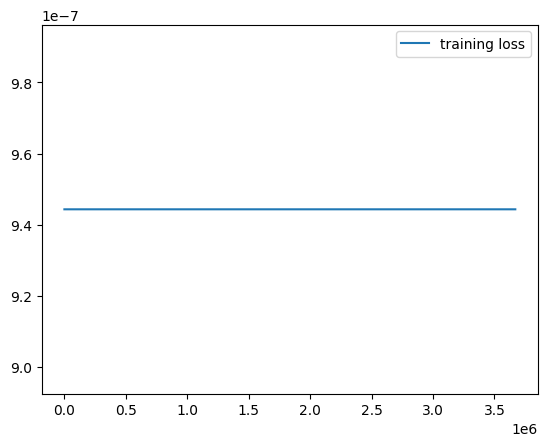

In [108]:
def chart(x_plane,loss_type):
    plt.figure()
    plt.plot([m for m in range(len(x_plane))],x_plane, label=loss_type)
    plt.legend()
    plt.show()

#plot training loss
chart(losses,'training loss')

In [94]:
def test(model,batch,targets):
    losses=[]
    corrects=[]
    for data,target in zip(batch,targets):
        n=len(batch)
        data=np.insert(data,0,1,axis=0)#add bias term
        output=model.forward(data)
        loss=criterion(output,target,n)
        pred=classify(output)
        cor=correct(pred,target)
        corrects.append(cor)
        losses.append(loss)
    accuracy=sum(corrects)/len(batch)
    accuracy=f'{round(accuracy*100,2)}%'
    return losses,accuracy

In [95]:
#test
batch=test_batch
target=test_target
model=model
test_loss,accuracy=test(model,batch,target)
print('test accuracy: ',accuracy)

ValueError: shapes (9920,7) and (8,4) not aligned: 7 (dim 1) != 8 (dim 0)

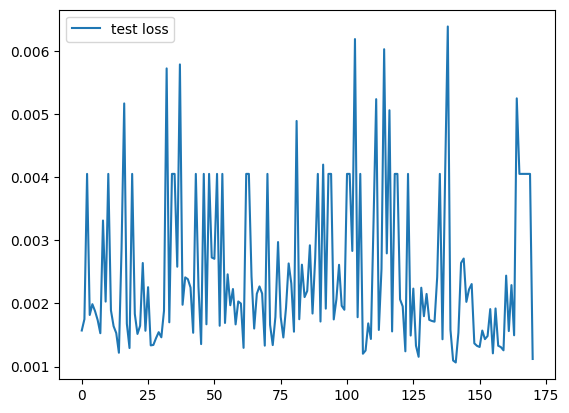

In [55]:
#plot test results
chart(test_loss,'test loss')